In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler  # Corrected import statement
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv('medical_cost_insurance.csv')

df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#Cheking first 5 rows of the dataset
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#Cheking last 5 rows of the dataset
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis (EDA)

In [5]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [6]:
#Cheking columns
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [7]:
print("The shape of dataset is :",df.shape)

The shape of dataset is : (1338, 7)


In [8]:
df = df.drop_duplicates()
print(f"Rows & Columns after deleting the duiplicates :",df.shape)

Rows & Columns after deleting the duiplicates : (1337, 7)


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


Using the df.info() method we can see that there is 2 column with int data type, 2 columns witn float data type, 3 columns witn object data type
Also we have no missing value present in our dataset.

In [10]:
df["charges"].value_counts()

charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64

In [11]:
# Getting the list of Categorical data type column names
categorical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        categorical_cols.append(x)
        
print(f"Object Data Type Columns are:\n", categorical_cols)

# Getting the list of Numeric data type column names
numerical_cols = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'float64' or df.dtypes[x] == 'int64':
        numerical_cols.append(x)
print(f"\nNumber Data Type Columns are: \n", numerical_cols)


Object Data Type Columns are:
 ['sex', 'smoker', 'region']

Number Data Type Columns are: 
 ['age', 'bmi', 'children', 'charges']


In [12]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [13]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
df.describe(include="all").T  #Discribe function we get all type of values


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1337.0,NaN,NaN,NaN,39.222139,14.044333,18.0,27.0,39.0,51.0,64.0
sex,1337,2,male,675,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1337.0,NaN,NaN,NaN,30.663452,6.100468,15.96,26.29,30.4,34.7,53.13
children,1337.0,NaN,NaN,NaN,1.095737,1.205571,0.0,0.0,1.0,2.0,5.0
smoker,1337,2,no,1063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1337,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1337.0,NaN,NaN,NaN,13279.121487,12110.359656,1121.8739,4746.344,9386.1613,16657.71745,63770.42801


In [15]:
df.nunique().to_frame("Unique Values")

,Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [16]:
# Explore summary statistics for numerical columns
for col in numerical_cols:
    print(col)
    print("Mean:", df[col].mean())
    print("Standard Deviation:", df[col].std())
    print("Minimum:", df[col].min())
    print("25th Percentile:", df[col].quantile(0.25))
    print("Median:", df[col].median())
    print("75th Percentile:", df[col].quantile(0.75))
    print("Maximum:", df[col].max())
    print("="*50)

age
Mean: 39.222139117427076
Standard Deviation: 14.044332734156422
Minimum: 18
25th Percentile: 27.0
Median: 39.0
75th Percentile: 51.0
Maximum: 64
bmi
Mean: 30.66345175766642
Standard Deviation: 6.100468409615801
Minimum: 15.96
25th Percentile: 26.29
Median: 30.4
75th Percentile: 34.7
Maximum: 53.13
children
Mean: 1.0957367240089753
Standard Deviation: 1.2055714286412185
Minimum: 0
25th Percentile: 0.0
Median: 1.0
75th Percentile: 2.0
Maximum: 5
charges
Mean: 13279.121486655948
Standard Deviation: 12110.359656344179
Minimum: 1121.8739
25th Percentile: 4746.344
Median: 9386.1613
75th Percentile: 16657.71745
Maximum: 63770.42801


In [17]:
#Exploring unique values in each categorical coloumn
for col in categorical_cols:
    print(col)
    print(df[col].value_counts())
    print("="*50)

sex
sex
male      675
female    662
Name: count, dtype: int64
smoker
smoker
no     1063
yes     274
Name: count, dtype: int64
region
region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


Cheking no of rows covered by  all unique values  present in our object data type columns.
It look like all the column have proper categories.

In [18]:
 df['region'].isnull().sum()

0

Now heare we have every column at the right place depending on it's datatype.
So we can proced further.

# Visualization

Charges is our target variable.

In [19]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


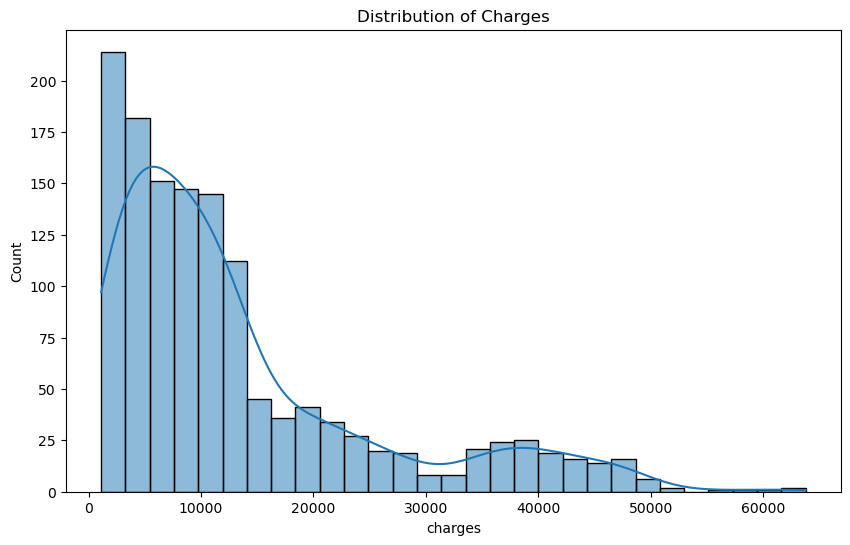

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

 Distribution of charges

sex
male      675
female    662
Name: count, dtype: int64


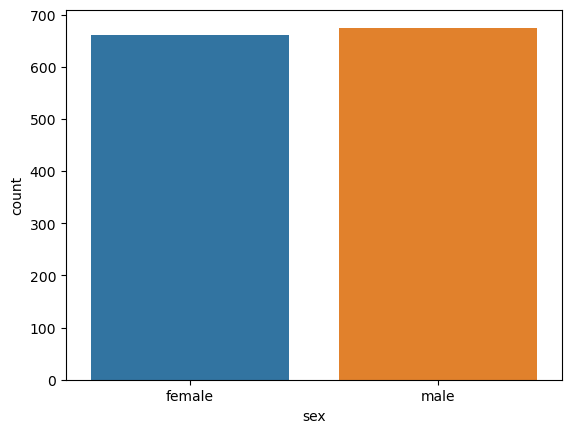

In [21]:
ax = sns.countplot (x='sex',data=df[categorical_cols])
print(df['sex'].value_counts())

smoker
no     1063
yes     274
Name: count, dtype: int64


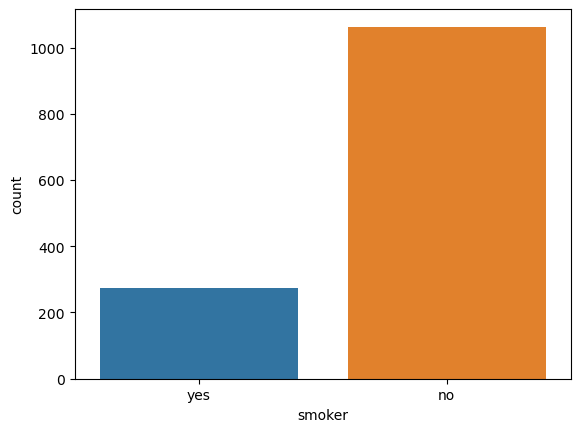

In [22]:
ax = sns.countplot (x='smoker',data=df[categorical_cols])
print(df['smoker'].value_counts())

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


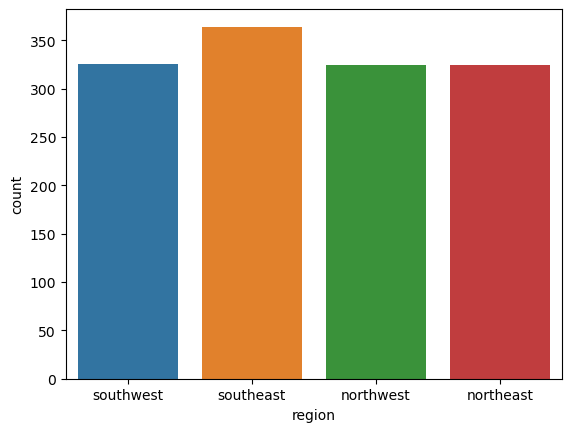

In [23]:
ax = sns.countplot (x='region',data=df[categorical_cols])
print(df['region'].value_counts())

Exploring Continuus Columns

0.054780773126998195


<Axes: xlabel='age', ylabel='Density'>

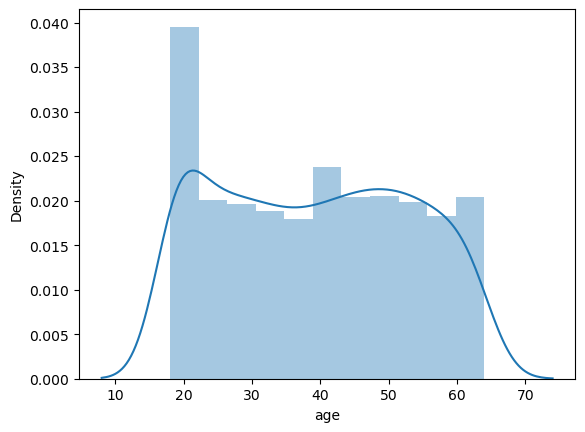

In [24]:
print(df['age'].skew())
sns.distplot(df['age'],kde=True)

0.28391419385321137


<Axes: xlabel='bmi', ylabel='Density'>

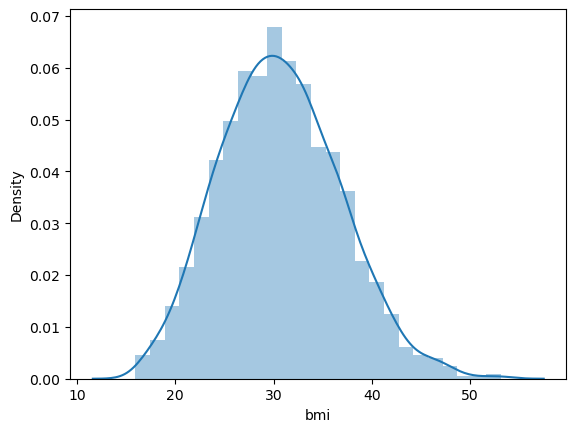

In [25]:
print(df['bmi'].skew())
sns.distplot(df['bmi'],kde=True)

0.9374206440474123


<Axes: xlabel='children', ylabel='Density'>

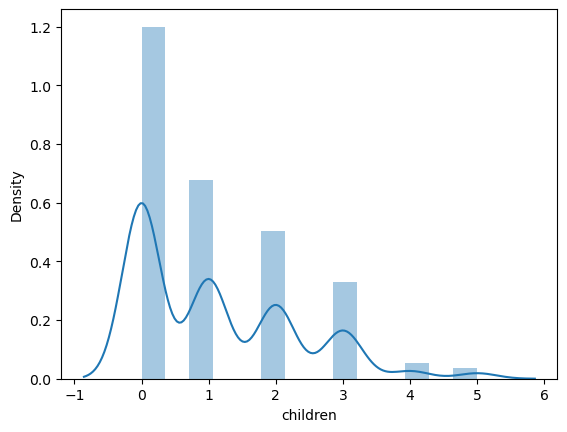

In [26]:
print(df['children'].skew())
sns.distplot(df['children'],kde=True)

1.5153909108403483


<Axes: xlabel='charges', ylabel='Density'>

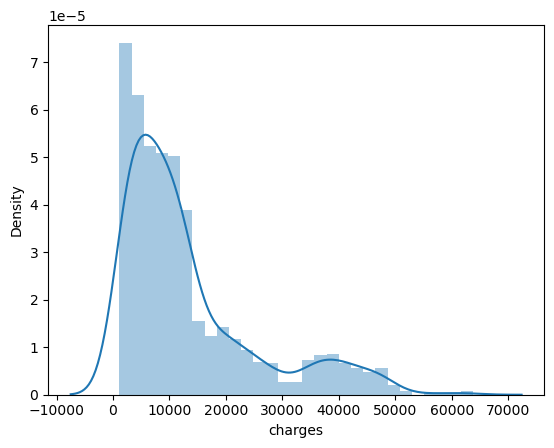

In [27]:
print(df['charges'].skew())
sns.distplot(df['charges'],kde=True)

Skewness found will fix this later in the project

Object Data Type Columns are:
 ['sex', 'smoker', 'region']

Number Data Type Columns are: 
 ['age', 'bmi', 'children', 'charges']


<Axes: xlabel='age', ylabel='bmi'>

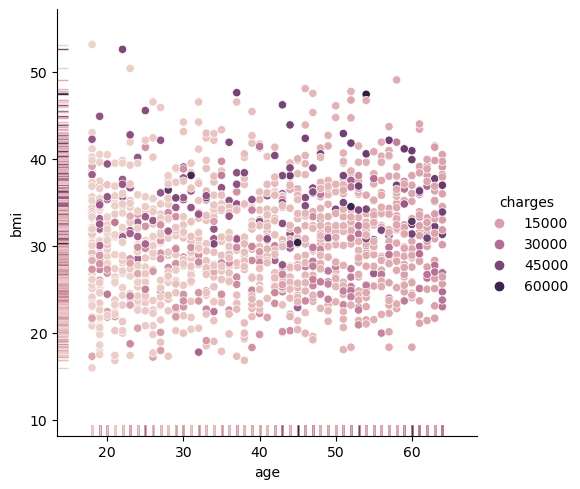

In [28]:
sns.relplot(data=df, x='age', y='bmi', hue='charges')
sns.rugplot(data=df, x='age', y='bmi', hue='charges', legend=False)

<Axes: xlabel='bmi', ylabel='children'>

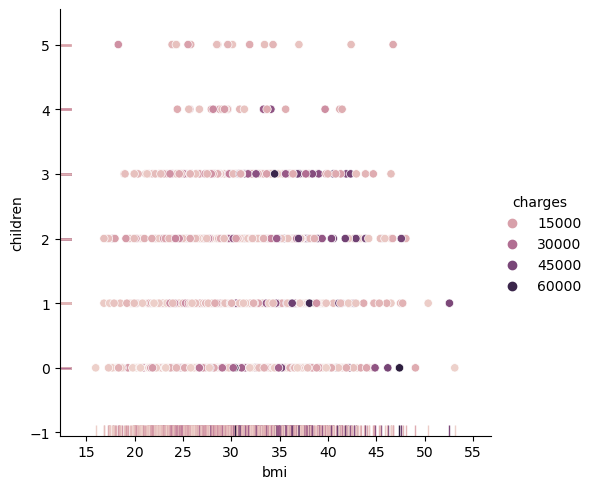

In [29]:
sns.relplot(data=df, x='bmi', y='children', hue='charges')
sns.rugplot(data=df, x='bmi', y='children', hue='charges', legend=False)

<Axes: xlabel='age', ylabel='bmi'>

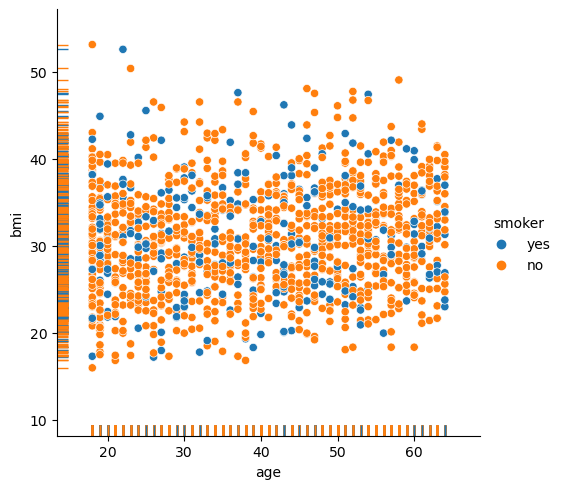

In [30]:
sns.relplot(data=df, x='age', y='bmi', hue='smoker')
sns.rugplot(data=df, x='age', y='bmi', hue='smoker', legend=False)

<Axes: xlabel='bmi', ylabel='charges'>

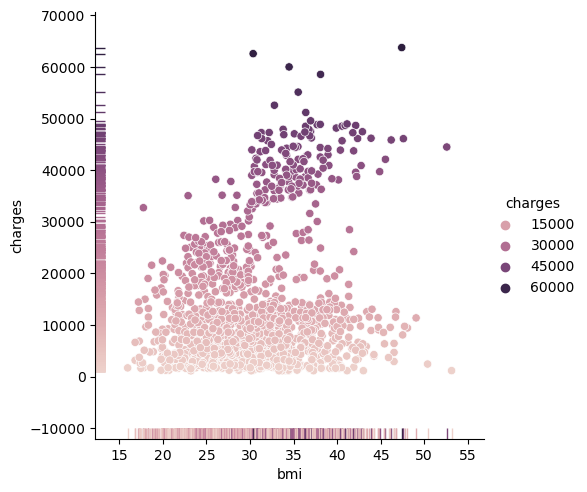

In [31]:
sns.relplot(data=df, x='bmi', y='charges', hue='charges')
sns.rugplot(data=df, x='bmi', y='charges', hue='charges', legend=False)

In [32]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Encoading the Categorical object datatype columns 

In [33]:
from sklearn.preprocessing import LabelEncoder

In [34]:
le=LabelEncoder()

In [35]:
for i in  df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int32  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int32  
 5   region    1337 non-null   int32  
 6   charges   1337 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 100.2 KB


Sucessfully Converted Object Datatype into int datatype
Cheking for non values after applying transformation technique

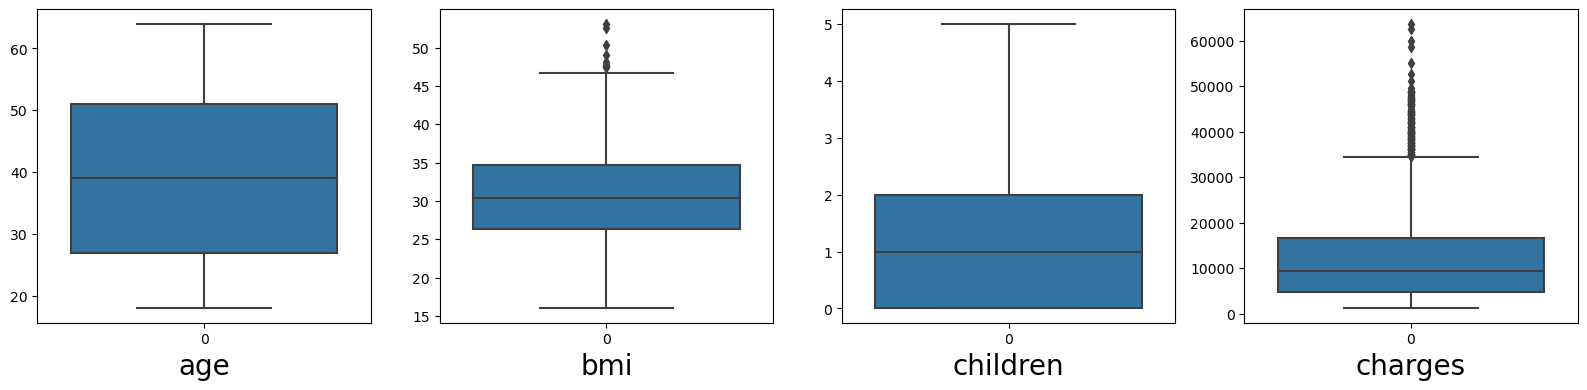

In [37]:
plt.figure(figsize=(20,15),facecolor='white')
plot_number = 1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
    
plt.tight_layout()

With the usage of box plot we tried  to check for outliers in our continous data columns and we found no outliers in them  

In [38]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

With the skew method we see that there are column present in our data set that are above the aceptable range of +/-0.5 value however most of those are Categorical columns and do not worry about outliers or skewness in catagorical data therefore we will ignore having said that the skewness that is present 
In our continous data columns in catagorical column we wont have to fix any other concern in our dataset. 

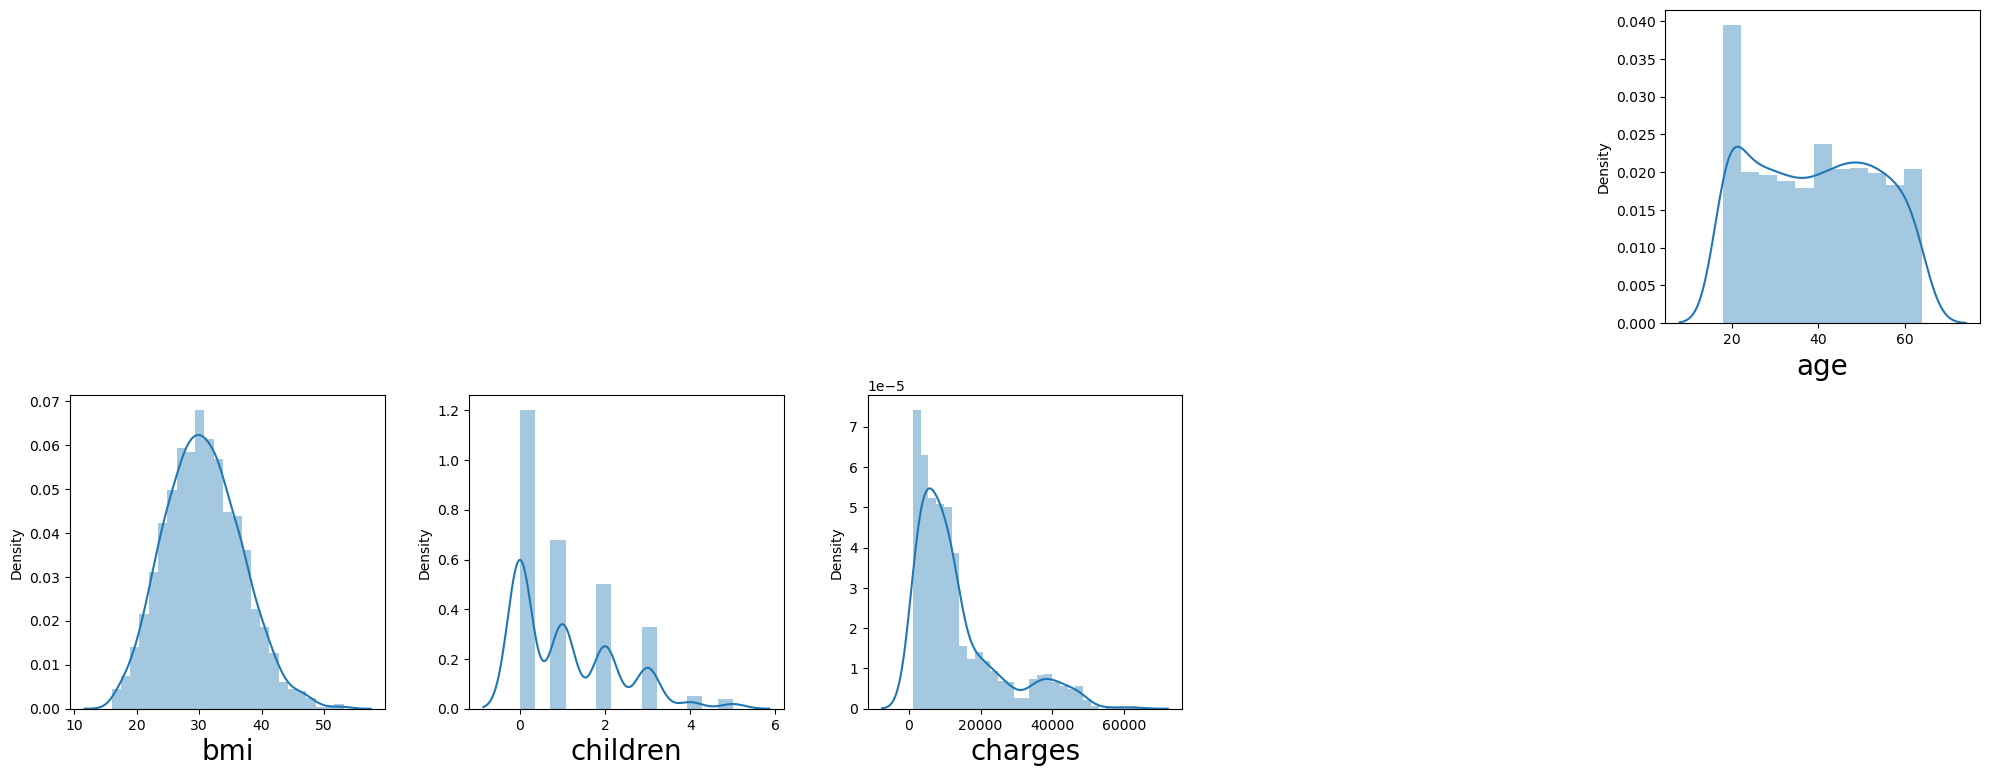

In [39]:
plt.figure(figsize=(20,15),facecolor='white')
plot_numbers=1

for column in df[numerical_cols]:
    if plot_number <=20:
        ax=plt.subplot(4,5,plot_number)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
        
    plot_number +=1
    
plt.tight_layout()    
        

In the above distribution  plot we can see that our continous data columns have some skewness that will need to be treated and reduced  to cover up an 
acceptable range in data values.

In [40]:
for col in numerical_cols:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [41]:
df[numerical_cols].skew()

age         0.054781
bmi         0.283914
children    0.262813
charges    -0.089558
dtype: float64

Here we have handle the skewness in continous data

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

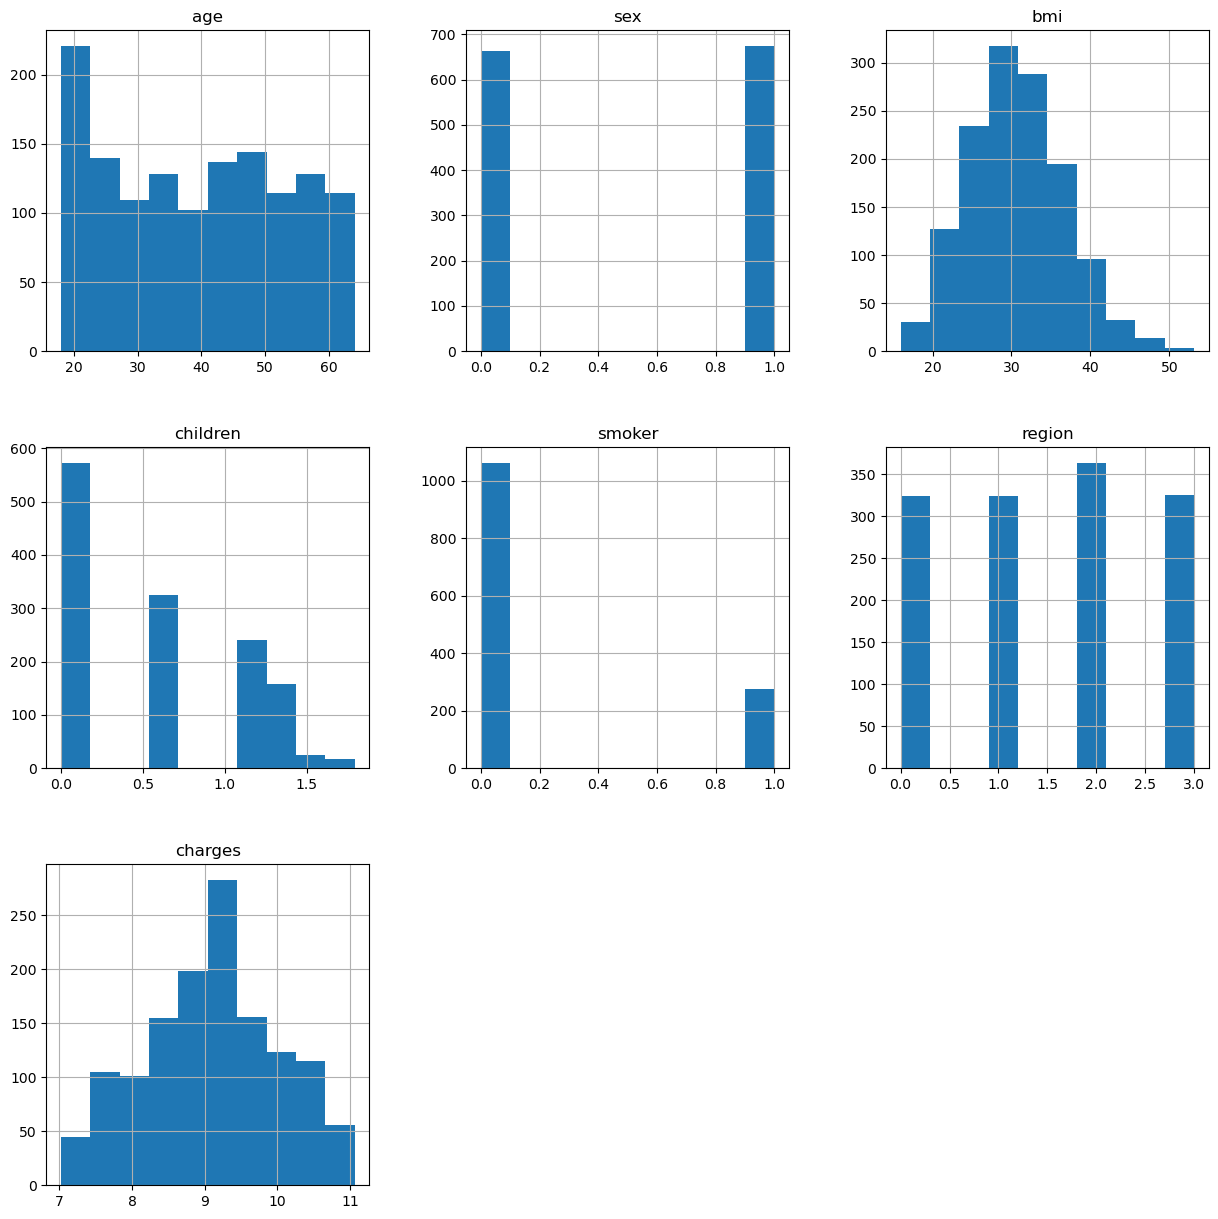

In [42]:
df.hist(figsize=(15,15))

I have generated a histogram for all our dataset columns after applying encoading technique & converting all object datatype columns to numeric datatype values 

In [43]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.047340,-0.025587,0.001626,0.526900
sex,-0.019814,1.000000,0.046397,0.017081,0.076596,0.004936,0.007022
bmi,0.109344,0.046397,1.000000,0.016175,0.003746,0.157574,0.132831
children,0.047340,0.017081,0.016175,1.000000,0.012856,0.013365,0.170610
smoker,-0.025587,0.076596,0.003746,0.012856,1.000000,-0.002358,0.665751
region,0.001626,0.004936,0.157574,0.013365,-0.002358,1.000000,-0.043386
charges,0.526900,0.007022,0.132831,0.170610,0.665751,-0.043386,1.000000


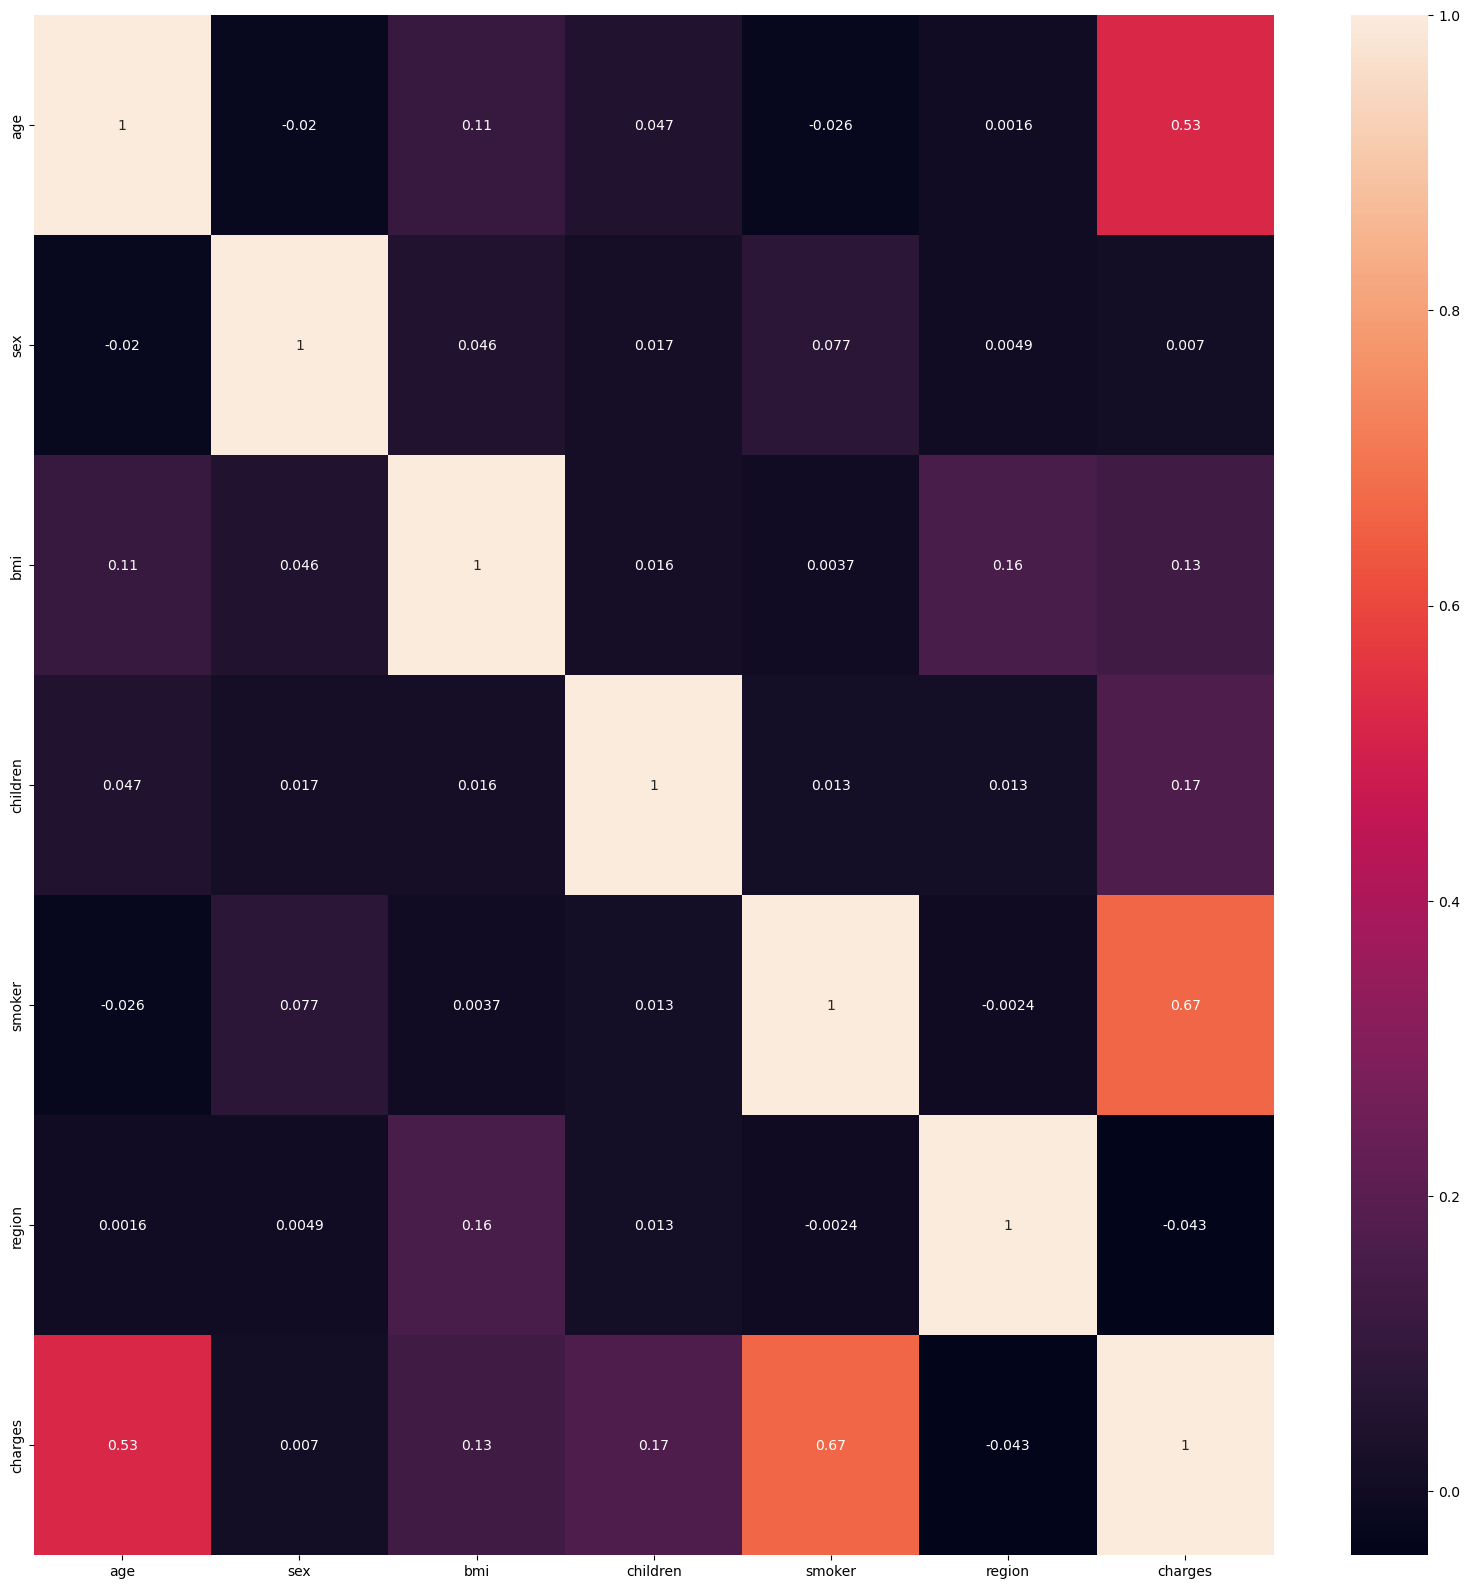

In [44]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)
plt.show()

Positive Correlation:- A correlation of +1 indicates a perfect positive correlation meaning that both variables move in the same direction together
Negative Correlation:- A Correlation of -1 indicates a perfect negative correlation meaning that as one variable goes up, the other goes down

In the above heatmap we can see the correlation details plus we can determine that there is no multi colinearity issue between our columns. 

# Correlation Bar Plot Comparing features with our lable

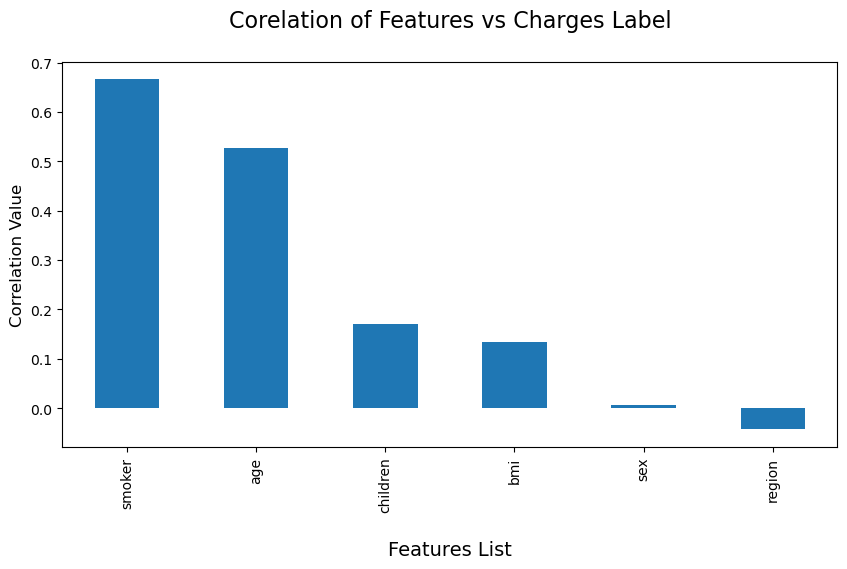

In [45]:
df_corr = df.corr()
plt.figure(figsize=(10,5))
df_corr['charges'].sort_values(ascending=False).drop('charges').plot.bar()
plt.title("Corelation of Features vs Charges Label\n", fontsize=16)
plt.xlabel("\nFeatures List",fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

Since the heatmap was not able to give us a clear picture on positive & negative correlation columns we have generated this bar plot & we see that columns smoker, age, children, bmi, sex, region.
smoker, age, children, bmi, sex are positively correlated our target label charges while the remaining features region are negativelly correlated with our label column.

Splitting the data set into 2 vaiables namely x & y for feture & label 

In [46]:
pip install imbalanced-learn pandas


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [47]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.000000,1,3,9.734236
1,18,1,33.770,0.693147,0,2,7.453882
2,28,1,33.000,1.386294,0,2,8.400763
3,33,1,22.705,0.000000,0,1,9.998137
4,32,1,28.880,0.000000,0,1,8.260455
...,...,...,...,...,...,...,...
1333,50,1,30.970,1.386294,0,1,9.268755
1334,18,0,31.920,0.000000,0,0,7.699381
1335,18,0,36.850,0.000000,0,2,7.396847
1336,21,0,25.800,0.000000,0,3,7.605365


In [48]:
x = df.drop('charges',axis=1)


In [49]:
y = df['charges']

Resolving the class imbalance issue in our column

In [50]:
y.value_counts()

charges
9.734236     1
7.658387     1
7.706417     1
9.893389     1
9.477683     1
            ..
8.901923     1
10.170086    1
10.250225    1
7.047861     1
10.279948    1
Name: count, Length: 1337, dtype: int64

In [51]:
from imblearn.over_sampling import SMOTE

In [52]:
sm = SMOTE()

In [53]:
y.value_counts()

charges
9.734236     1
7.658387     1
7.706417     1
9.893389     1
9.477683     1
            ..
8.901923     1
10.170086    1
10.250225    1
7.047861     1
10.279948    1
Name: count, Length: 1337, dtype: int64

In [54]:
# Convert charges into categorical variable by binning
df['charges_category'] = pd.cut(df['charges'], bins=3, labels=[0,1,2])

# Define X and Y
x = df.drop(['charges', 'charges_category'], axis=1)
y = df['charges_category']

# Resample using SMOTE
X_resampled, Y_resampled = sm.fit_resample(x, y)


In [55]:
X,Y = sm.fit_resample(x,y)

After applying Over sampling we are once again listing the values of our label column to cross verify the updeted information Hence we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the ML model does not get biased towards one category

# Scaling & Feature

In [56]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
x

array([[-1.44041773, -1.00977099, -0.45315959, -1.04316014,  1.96966039,
         1.34316271],
       [-1.51164747,  0.99032355,  0.50942165,  0.19882044, -0.50770174,
         0.43801727],
       [-0.79935006,  0.99032355,  0.3831546 ,  1.44080103, -0.50770174,
         0.43801727],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, -1.04316014, -0.50770174,
         0.43801727],
       [-1.29795825, -1.00977099, -0.79752426, -1.04316014, -0.50770174,
         1.34316271],
       [ 1.55123139, -1.00977099, -0.26129928, -1.04316014,  1.96966039,
        -0.46712816]])

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score, GridSearchCV


Finding best Random State for building our Classification Models

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


lr = LogisticRegression()

maxAcc = 0
best_rs = 0

for i in range(1000):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=i)
    
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    ac = accuracy_score(y_test, pred)
    
    if ac > maxAcc:
        maxAcc = ac
        best_rs = i

print('Best accuracy score:', maxAcc)
print('Random State:', best_rs)


Best accuracy score: 0.9283582089552239
Random State: 111


In [59]:
# Let us split the data now at that random state
# Splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=60)


In [60]:
# Print the size of x_train
print("Size of x_train:", x_train.shape)

# Print the size of x_test
print("Size of x_test:", x_test.shape)

# Print the size of y_train
print("Size of y_train:", y_train.shape)

# Print the size of y_test
print("Size of y_test:", y_test.shape)

Size of x_train: (1002, 6)
Size of x_test: (335, 6)
Size of y_train: (1002,)
Size of y_test: (335,)


# Machine Lerning Model for Classification with Evaluation Metrice

In [61]:
def classify(clf, x, y):
    # Splitting the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=868)

    # Training the model
    clf.fit(x_train, y_train)

    # Predicting Y test
    pred = clf.predict(x_test)

    # Accuracy Score
    acc_score = accuracy_score(y_test, pred)
    print("Accuracy Score:", acc_score)

    # Confusion Matrix
    print('Confusion Matrix:\n', confusion_matrix(y_test, pred))

    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)

    # Cross Validation Score
    cv_scores = cross_val_score(clf, x, y, cv=5)
    cv_mean = cv_scores.mean()
    print("Cross Validation Score:", cv_mean)

    # Result of accuracy minus CV scores
    result = acc_score - cv_mean
    print("\nAccuracy Score minus Cross Validation Score is", result)

# Logestic Regression

In [62]:
clf = LogisticRegression()
classify(clf,x,y)

Accuracy Score: 0.8955223880597015
Confusion Matrix:
 [[ 57   9   0]
 [  3 184   4]
 [  2  17  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.86      0.89        66
           1       0.88      0.96      0.92       191
           2       0.94      0.76      0.84        78

    accuracy                           0.90       335
   macro avg       0.91      0.86      0.88       335
weighted avg       0.90      0.90      0.89       335

Cross Validation Score: 0.890818380010062

Accuracy Score minus Cross Validation Score is 0.004704008049639552


# Dession TreeClassification

In [63]:
clf = DecisionTreeClassifier()
classify(clf,x,y)

Accuracy Score: 0.817910447761194
Confusion Matrix:
 [[ 50   6  10]
 [  6 163  22]
 [  2  15  61]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81        66
           1       0.89      0.85      0.87       191
           2       0.66      0.78      0.71        78

    accuracy                           0.82       335
   macro avg       0.80      0.80      0.80       335
weighted avg       0.83      0.82      0.82       335

Cross Validation Score: 0.8130191737939516

Accuracy Score minus Cross Validation Score is 0.004891273967242427


# Random Forest Classifier

In [64]:
clf = RandomForestClassifier()
classify(clf,x,y)

Accuracy Score: 0.8865671641791045
Confusion Matrix:
 [[ 56   8   2]
 [  5 182   4]
 [  3  16  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.86        66
           1       0.88      0.95      0.92       191
           2       0.91      0.76      0.83        78

    accuracy                           0.89       335
   macro avg       0.89      0.85      0.87       335
weighted avg       0.89      0.89      0.88       335

Cross Validation Score: 0.894563698362122

Accuracy Score minus Cross Validation Score is -0.00799653418301749


# SVC

In [65]:
clf = SVC()
classify(clf,x,y)

Accuracy Score: 0.8985074626865671
Confusion Matrix:
 [[ 57   9   0]
 [  3 185   3]
 [  3  16  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        66
           1       0.88      0.97      0.92       191
           2       0.95      0.76      0.84        78

    accuracy                           0.90       335
   macro avg       0.91      0.86      0.88       335
weighted avg       0.90      0.90      0.90       335

Cross Validation Score: 0.89679691430488

Accuracy Score minus Cross Validation Score is 0.0017105483816871603


# KNeighborsClassifier

In [66]:
clf = KNeighborsClassifier()
classify(clf,x,y)

Accuracy Score: 0.8805970149253731
Confusion Matrix:
 [[ 57   8   1]
 [  7 179   5]
 [  3  16  59]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86        66
           1       0.88      0.94      0.91       191
           2       0.91      0.76      0.83        78

    accuracy                           0.88       335
   macro avg       0.88      0.85      0.86       335
weighted avg       0.88      0.88      0.88       335

Cross Validation Score: 0.8653865503940971

Accuracy Score minus Cross Validation Score is 0.015210464531276058


# XGB

In [67]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable


In [68]:
import xgboost as xgb

clf = xgb.XGBClassifier()
classify(clf,x,y)

Accuracy Score: 0.8925373134328358
Confusion Matrix:
 [[ 59   4   3]
 [  6 180   5]
 [  4  14  60]]

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87        66
           1       0.91      0.94      0.93       191
           2       0.88      0.77      0.82        78

    accuracy                           0.89       335
   macro avg       0.88      0.87      0.87       335
weighted avg       0.89      0.89      0.89       335

Cross Validation Score: 0.8810973223768797

Accuracy Score minus Cross Validation Score is 0.011439991055956167


# GradientBoostingClassifier

In [69]:
clf = GradientBoostingClassifier()
classify(clf,x,y)

Accuracy Score: 0.9104477611940298
Confusion Matrix:
 [[ 61   5   0]
 [  3 186   2]
 [  3  17  58]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.92      0.92        66
           1       0.89      0.97      0.93       191
           2       0.97      0.74      0.84        78

    accuracy                           0.91       335
   macro avg       0.92      0.88      0.90       335
weighted avg       0.91      0.91      0.91       335

Cross Validation Score: 0.8952931969366649

Accuracy Score minus Cross Validation Score is 0.015154564257364944


# Frome the above Evaluation Metrics, we can  clearly see that RandomForestClassifier is gioving best f1 score and least difference between accuracy score  & CV score so  selecting RandomForestClassifier ad a our final model 

In [70]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy Score: ",accuracy_score(y_test,pred))
print("Confussion Matrix: ",confusion_matrix(y_test,pred))
print("Classification Report: \n",classification_report(y_test,pred))

Accuracy Score:  0.8955223880597015
Confussion Matrix:  [[ 52   4   0]
 [  6 183   4]
 [  3  18  65]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.93      0.89        56
           1       0.89      0.95      0.92       193
           2       0.94      0.76      0.84        86

    accuracy                           0.90       335
   macro avg       0.90      0.88      0.88       335
weighted avg       0.90      0.90      0.89       335



# Hyper Parameter tuning on RandomForestClassifier

In [71]:
from sklearn.model_selection import GridSearchCV

par = {
    'n_estimators': range(100, 500, 100),
    'criterion': ['gini', 'entropy'],
    'max_depth': range(0, 10, 5),
    'min_samples_split': range(2, 5),  
    'min_samples_leaf': range(1, 5),
    'max_features': ['auto']
}

# Creating a GridSearchCV object
grid = GridSearchCV(RandomForestClassifier(), param_grid=par, verbose=2, n_jobs=1)

# Fitting the grid to the training data
grid.fit(x_train, y_train)


Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END criterion=gini, max_depth=0, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=

ValueError: 
All the 960 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_depth' parameter of RandomForestClassifier must be an int in the range [1, inf) or None. Got 0 instead.

--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\Dhananjay\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_param_validation.py", line 95, in validate_parameter_constraints
    raise InvalidParameterError(
sklearn.utils._param_validation.InvalidParameterError: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


#int("Best Score:", grid.best_score_)
print("Best Estimator:", grid.best_estimator_)
print("Best Parameters:", grid.best_params_)


In [72]:
rf_final = RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=3, min_samples_split=10, max_features=None, n_estimators=200, random_state=487)
rf_final.fit(x_train, y_train)
predrf = rf_final.predict(x_test)

print('Accuracy:', accuracy_score(y_test, predrf))
print('Confusion Matrix:\n', confusion_matrix(y_test, predrf))
print('Classification Report:\n', classification_report(y_test, predrf))


Accuracy: 0.9044776119402985
Confusion Matrix:
 [[ 53   3   0]
 [  7 185   1]
 [  3  18  65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.95      0.89        56
           1       0.90      0.96      0.93       193
           2       0.98      0.76      0.86        86

    accuracy                           0.90       335
   macro avg       0.91      0.89      0.89       335
weighted avg       0.91      0.90      0.90       335



After twining parameters we are going the best accuracy score 0.90 which is less than the accuracy score by GradientBoostingClassifier()
without hyper parameter tunning so lets model in by defoult GradientBoostingClassifier


# AUC ROC Cureve

In [73]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn import metrics


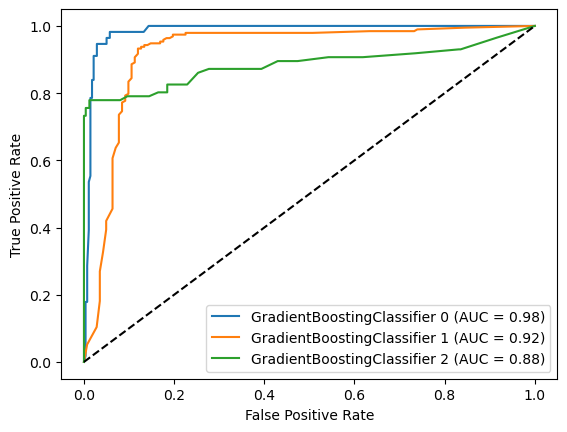

Overall AUC Score: 0.9304588567110309


In [74]:
from sklearn.preprocessing import label_binarize

# Binarize the labels for each class
y_test_binarized = label_binarize(y_test, classes=rf.classes_)

# Predicting the probability of each class in X-test
y_pred_prob = rf.predict_proba(x_test)

# Compute ROC-AUC score for each class
auc_scores = []
for i in range(len(rf.classes_)):
    auc_score = roc_auc_score(y_test_binarized[:, i], y_pred_prob[:, i])
    auc_scores.append(auc_score)
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'GradientBoostingClassifier {i} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Overall AUC score
overall_auc_score = np.mean(auc_scores)
print('Overall AUC Score:', overall_auc_score)


# Confusion Matrix

In [75]:
pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


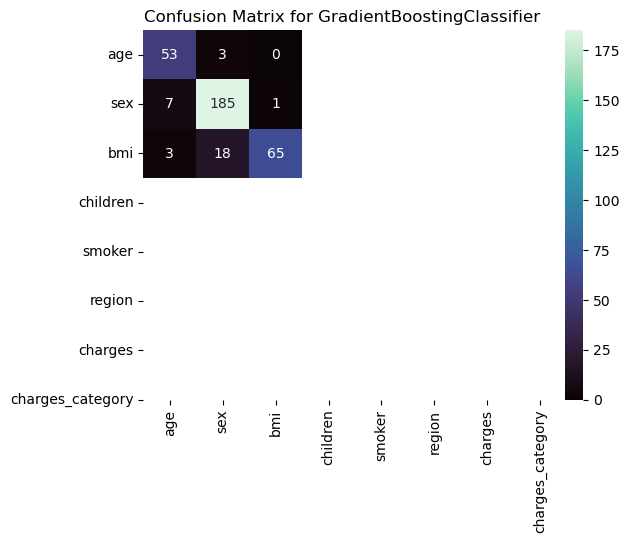

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = df.columns  # Assuming these are the class names

conf_matrix = confusion_matrix(y_test, predrf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='mako', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix for GradientBoostingClassifier')
plt.show()


With the help of above confusion matrix I'm able to understand the number of times I got the correct outputs and the number of times my ML model missed to provide the correct prediction
(depicting in the blank boxes)

# Saving the Model

In [77]:
import pickle

In [78]:
filename='Medical Cost Insurance Solution Project.pkl'

In [79]:
pickle.dump(rf,open(filename,'wb'))

In [80]:
#Conclusion
load_model=pickle.load(open('Medical Cost Insurance Solution Project.pkl','rb'))
result=load_model.score(x_test,y_test)
print(result*100)

89.55223880597015
